Coding a Predict model to predict Air Quality in New York

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# Importing data into pandas DataFrame
dataset = pd.read_csv(r'updated_air_quality_data.csv')

# DataFrame shape
dataset.shape

(18016, 9)

In [6]:
# Displaying the first rolls of the dataset
dataset.head()

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,179772,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.3,Good
1,179785,Emissions,Density,UHF42,Unknown,Other,2015-01-01,1.2,Good
2,178540,General Pollution,Miles,UHF42,Unknown,Annual Average,2011-12-01,8.6,Good
3,178561,General Pollution,Miles,UHF42,Queens,Annual Average,2011-12-01,8.0,Good
4,823217,General Pollution,Miles,UHF42,Queens,Summer,2022-06-01,6.1,Good


In [9]:
# Summary of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             18016 non-null  int64  
 1   Name                  18016 non-null  object 
 2   Measure               18016 non-null  object 
 3   Geo Type Name         18016 non-null  object 
 4   Geo Place Name        18016 non-null  object 
 5   Time Period           18016 non-null  object 
 6   Start_Date            18016 non-null  object 
 7   Data Value            18016 non-null  float64
 8   Air Quality Category  18016 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [14]:
# Seems like there is no missing values in this dataset, let's make sure of it
display(dataset.isna().sum())
display(dataset.isnull().sum())

Unique ID               0
Name                    0
Measure                 0
Geo Type Name           0
Geo Place Name          0
Time Period             0
Start_Date              0
Data Value              0
Air Quality Category    0
dtype: int64

Unique ID               0
Name                    0
Measure                 0
Geo Type Name           0
Geo Place Name          0
Time Period             0
Start_Date              0
Data Value              0
Air Quality Category    0
dtype: int64

In [10]:
# Statistical summary
dataset.describe()

,Unique ID,Data Value
count,18016.000000,18016.000000
mean,426187.112789,21.412678
std,250391.154793,23.976151
min,121644.000000,0.000000
25%,175300.750000,8.900000
50%,410798.500000,15.200000
75%,649886.250000,26.700000
max,828353.000000,424.700000


Data Visualizations

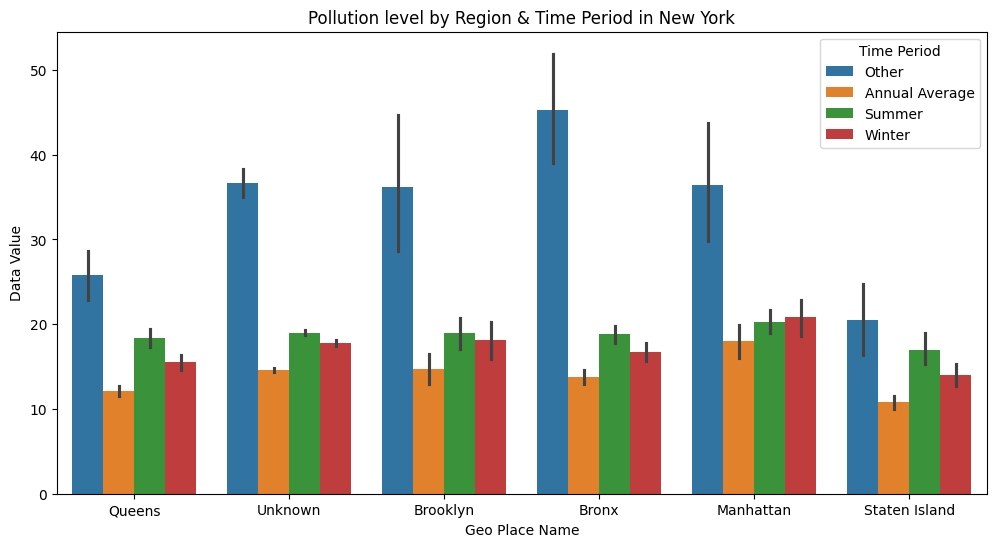

In [15]:
# Pollution level by Region & Time Period in New York
plt.figure(figsize = (12,6))
sns.barplot(data = dataset, x = 'Geo Place Name', y = 'Data Value', hue = 'Time Period')

plt.title("Pollution level by Region & Time Period in New York")
plt.show()

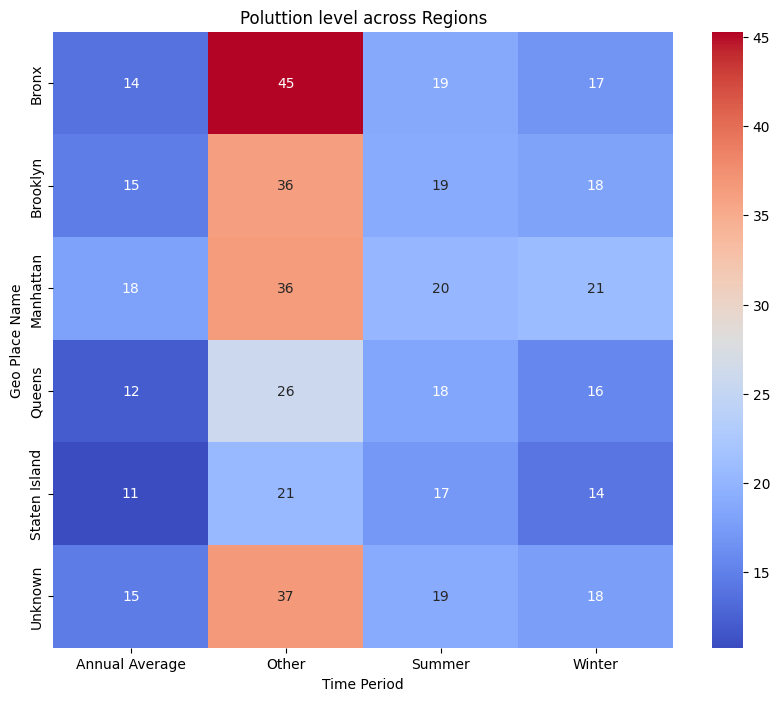

In [52]:
# Poluttion level across Regions based on Category
df_pivot = dataset.pivot_table(index = 'Geo Place Name', columns = 'Time Period', values = 'Data Value')

plt.figure(figsize = (10,8))
sns.heatmap(df_pivot, annot = True, cmap = 'coolwarm')

plt.xlabel('Time Period')
plt.ylabel('Geo Place Name')
plt.title('Poluttion level across Regions')
plt.show()

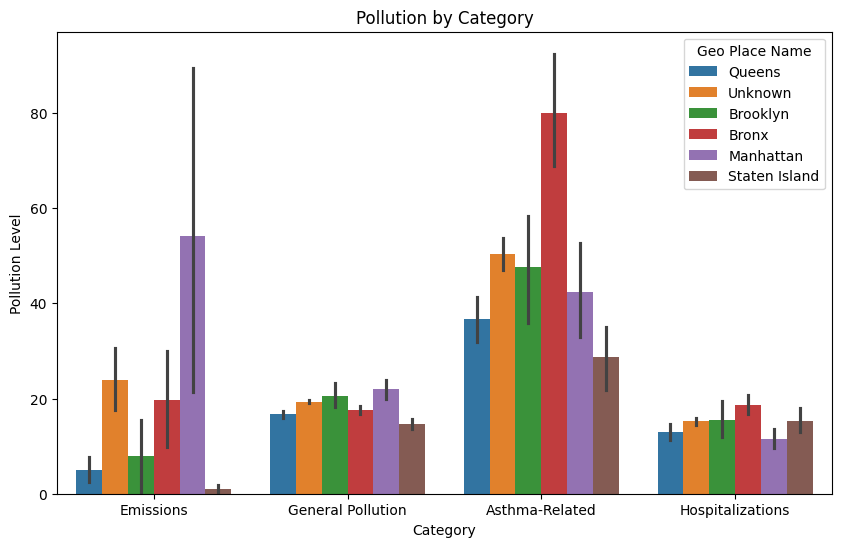

In [54]:
# Pollution by Category
plt.figure(figsize= (10,6))
sns.barplot(data = dataset
            ,x = 'Name'
            ,y = 'Data Value'
            ,hue = 'Geo Place Name'
               )

plt.xlabel('Category')
plt.ylabel('Pollution Level')
plt.title('Pollution by Category')
plt.show()

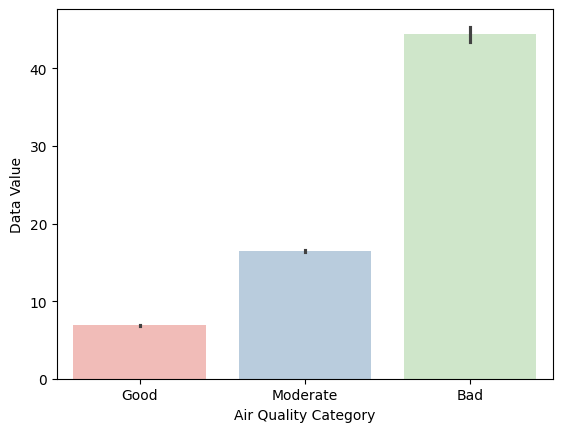

In [62]:
# Pollution Data Distribution by Air Quality Category
sns.barplot(data = dataset, x = 'Air Quality Category', y = 'Data Value', hue = 'Air Quality Category', palette = 'Pastel1')
plt.show()

Prediction Model

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             18016 non-null  int64  
 1   Name                  18016 non-null  object 
 2   Measure               18016 non-null  object 
 3   Geo Type Name         18016 non-null  object 
 4   Geo Place Name        18016 non-null  object 
 5   Time Period           18016 non-null  object 
 6   Start_Date            18016 non-null  object 
 7   Data Value            18016 non-null  float64
 8   Air Quality Category  18016 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [78]:
ml_dataset = dataset.drop(['Unique ID', 'Start_Date', 'Time Period'], axis = 1)

# Since modeling works only with numbers, we will transform non numeric columns into numeric ones, using LabelEncoder.
encoder = LabelEncoder()

for col in ml_dataset.columns:
  if ml_dataset[col].dtype == 'object':
    ml_dataset[col] = encoder.fit_transform(ml_dataset[col])
  
ml_dataset.head()

,Name,Measure,Geo Type Name,Geo Place Name,Data Value,Air Quality Category
0,1,1,4,3,0.3,1
1,1,1,4,5,1.2,1
2,2,2,4,5,8.6,1
3,2,2,4,3,8.0,1
4,2,2,4,3,6.1,1


In [84]:
# Removing columns that will not be used for model training, those will be stored as X and y, y beeing the target values
X = ml_dataset.drop('Air Quality Category', axis = 1).values
y = ml_dataset['Air Quality Category'].values

# Separating dataset into train and test variables. Since it is a large amount of data, we will consider 15% as test size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Creating an instance of the predicting model. We will be using the KNeighborsClassifier and DecisionTreeClassifier. It will be tested using the Accuracy Score and the Classification Report.

KNeighborsClassifier:

In [85]:
# Getting the best number of neighbors:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)  # Testar n_neighbors de 1 a 20

# List to store results
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross validation with 5 divisions
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Find the k value with best performance
best_k = k_values[np.argmax(scores)]
print(f"Best value for n_neighbors: {best_k}")

Best value for n_neighbors: 8


In [86]:
# Creating instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

# Fitting out model using the train variables
knn.fit(X_train, y_train)

# Predicting our data from the test variables
knn_prediction = knn.predict(X_test)

In [90]:
# Evaluation
print("KNN Classification Report: ")
print(classification_report(y_test, knn_prediction))

knn_accuracy = accuracy_score(y_test, knn_prediction)
print(f'Accuracy for KNeighbors: {format(np.round(knn_accuracy * 100, 2))}%')

KNN Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1563
           1       0.99      1.00      1.00      1738
           2       1.00      0.99      1.00      2104

    accuracy                           1.00      5405
   macro avg       1.00      1.00      1.00      5405
weighted avg       1.00      1.00      1.00      5405

Accuracy for KNeighbors: 99.65%
